In [1]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
seed = 0
np.random.seed(seed)

m1 = -1
std1 = 2
n = 100

a = -2
b = 0

In [4]:
var1 = std1**2
m2 = (a + b) / 2
var2 = ((a-b)**2)/12
std2 = (((a-b)**2)/12)**0.5
print(m2, var2, std2)

-1.0 0.3333333333333333 0.5773502691896257


In [12]:
x = sts.norm.rvs(loc=m1, scale=std1, size=n, random_state=seed)
y = sts.uniform.rvs(loc=a, scale=b-a, size=n, random_state=seed)
d1 = sts.describe(x)
d2 = sts.describe(y)
print(d1[2], d1[3], d1[3]**0.5)
print(d2[2], d2[3], d2[3]**0.5)

-0.8803839689310301 4.1043499766259846 2.0259195385370035
-1.0544123209749647 0.3358295573914843 0.579508030480583


In [13]:
print(sts.pearsonr(x, y))
print(sts.spearmanr(x, y))
print(sts.kendalltau(x, y))

(-0.13073032423139339, 0.19482435211486432)
SpearmanrResult(correlation=-0.13392139213921392, pvalue=0.1840561978066344)
KendalltauResult(correlation=-0.09131313131313133, pvalue=0.17826743491703323)


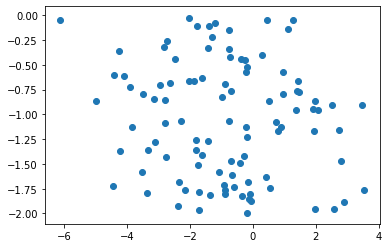

In [14]:
plt.scatter(x, y)

[[ 1.  1.  1.  1.  2.]
 [ 3.  4.  5.  6.  2.]
 [10.  8.  2.  6.  9.]
 [ 7.  2.  6.  8.  4.]
 [ 4.  1.  7.  0.  0.]]
[-6.10597963 -4.17688186 -2.24778408 -0.3186863   1.61041147  3.53950925]
[-1.99060905 -1.5971377  -1.20366636 -0.81019501 -0.41672367 -0.02325232]
[[1.5  0.96 1.26 1.26 1.02]
 [5.   3.2  4.2  4.2  3.4 ]
 [8.75 5.6  7.35 7.35 5.95]
 [6.75 4.32 5.67 5.67 4.59]
 [3.   1.92 2.52 2.52 2.04]]
26.23656814577683 0.050789113492577045


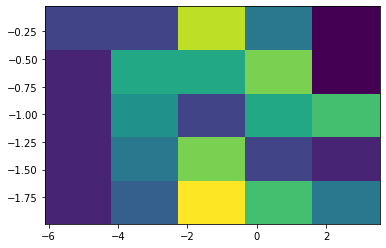

In [22]:
hist = plt.hist2d(x, y, bins=5)
print(hist[0])
print(hist[1])
print(hist[2])
stat = sts.chi2_contingency(hist[0])
print(stat[3])
print(stat[0], stat[1])

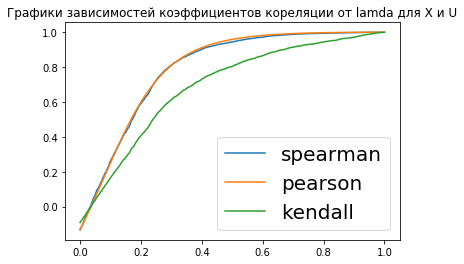

In [27]:
l = np.linspace(0, 1, num=1000)
def U(x, y, l):
     return l*x + (1-l)*y

def V(x, y, l):
     return l*x**3 + (1-l)*y**3

pearson = np.empty([2, 1000])
spearman = np.empty([2, 1000])
kendall = np.empty([2, 1000])
for i in range(1000):
    spearman[0, i], spearman[1, i] = sts.spearmanr(x, U(x, y, l[i]))[0], sts.spearmanr(x, V(x, y, l[i]))[0]
    pearson[0, i], pearson[1, i] = sts.pearsonr(x, U(x, y, l[i]))[0], sts.pearsonr(x, V(x, y, l[i]))[0]
    kendall[0, i], kendall[1, i] = sts.kendalltau(x, U(x, y, l[i]))[0], sts.kendalltau(x, V(x, y, l[i]))[0]
plt.title('Графики зависимостей коэффициентов кореляции от lamda для X и U')
plt.plot(l, spearman[0], label='spearman')
plt.plot(l, pearson[0], label='pearson')
plt.plot(l, kendall[0], label='kendall')
plt.legend(prop={'size' : 20}, loc='lower right')
plt.show()

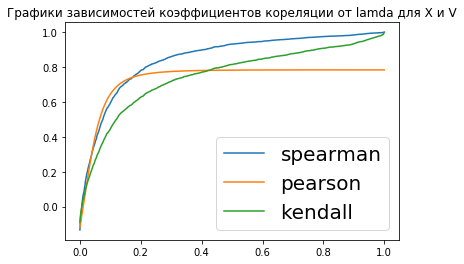

In [28]:
plt.title('Графики зависимостей коэффициентов кореляции от lamda для X и V')
plt.plot(l, spearman[1], label='spearman')
plt.plot(l, pearson[1], label='pearson')
plt.plot(l, kendall[1], label='kendall')
plt.legend(prop={'size' : 20}, loc='lower right')
plt.show()

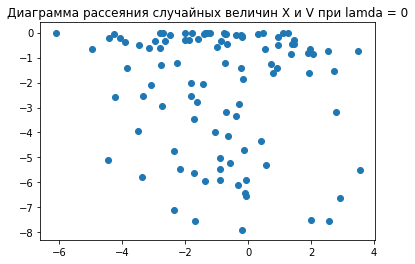

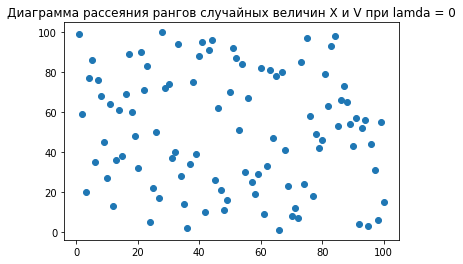

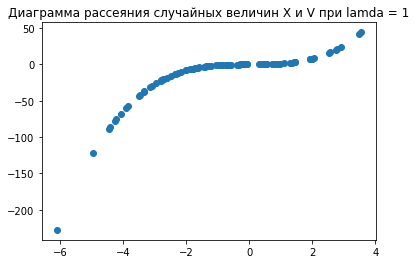

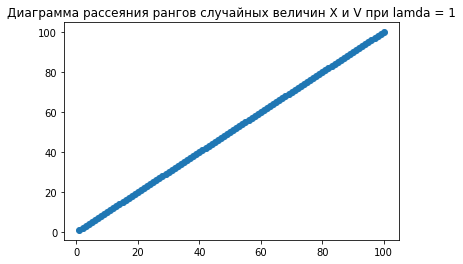

In [30]:
plt.title('Диаграмма рассеяния случайных величин X и V при lamda = 0')
plt.scatter(x, V(x, y, 0))
plt.show()

plt.title('Диаграмма рассеяния рангов случайных величин X и V при lamda = 0')
plt.scatter(sts.rankdata(x), sts.rankdata(V(x, y, 0)))
plt.show()

plt.title('Диаграмма рассеяния случайных величин X и V при lamda = 1')
plt.scatter(x, V(x, y, 1))
plt.show()

plt.title('Диаграмма рассеяния рангов случайных величин X и V при lamda = 1')
plt.scatter(sts.rankdata(x), sts.rankdata(V(x, y, 1)))
plt.show()